In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

In [2]:
from pmdarima import auto_arima

In [3]:
df=pd.read_excel("D:\\DATASETS\\GOAT.xlsx",parse_dates=['date'])

In [4]:
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,Adilabad,2018-01-01,0.0,10.4,29.7,41.8,83.8,0.0,5.7
1,Adilabad,2018-01-02,0.0,11.2,34.8,29.8,74.6,0.0,4.8
2,Adilabad,2018-01-03,0.0,17.3,38.0,31.8,71.5,0.0,3.4
3,Adilabad,2018-01-04,0.0,27.3,41.0,24.9,75.6,0.0,7.7
4,Adilabad,2018-01-05,0.0,28.7,43.2,27.7,48.9,0.0,13.5


In [5]:
df=df[['date','temp_min']]

In [6]:
df

,date,temp_min
0,2018-01-01,10.4
1,2018-01-02,11.2
2,2018-01-03,17.3
3,2018-01-04,27.3
4,2018-01-05,28.7
...,...,...
1729,2022-09-26,22.6
1730,2022-09-27,23.9
1731,2022-09-28,22.6
1732,2022-09-29,23.4


In [8]:
ndf=df.resample('M',on='date').mean()

In [9]:
ndf

,temp_min
date,
2018-01-31,15.241935
2018-02-28,19.053571
2018-03-31,21.493548
2018-04-30,24.910000
2018-05-31,26.441935
2018-06-30,24.420000
2018-07-31,23.596774
2018-08-31,22.738710
2018-09-30,22.630000


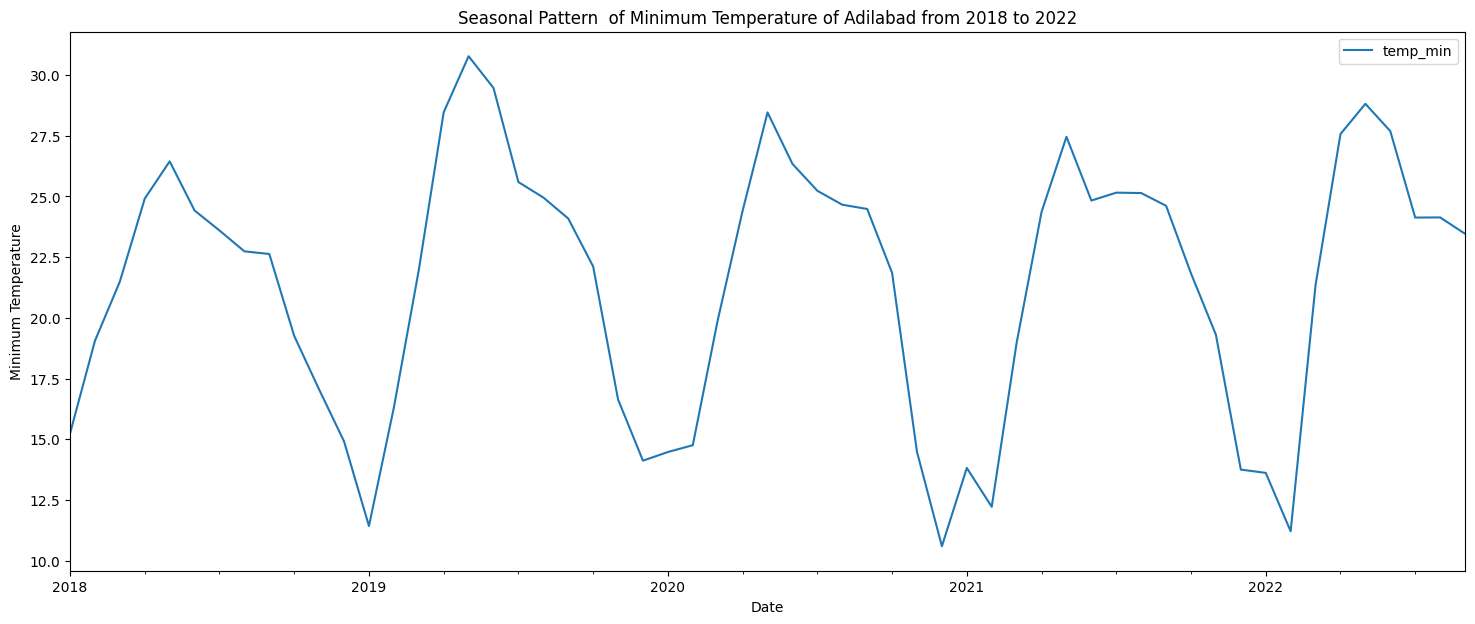

In [10]:
ndf.plot(figsize=(18,7))
plt.title("Seasonal Pattern  of Minimum Temperature of Adilabad from 2018 to 2022")
plt.xlabel("Date")
plt.ylabel("Minimum Temperature")
plt.show()

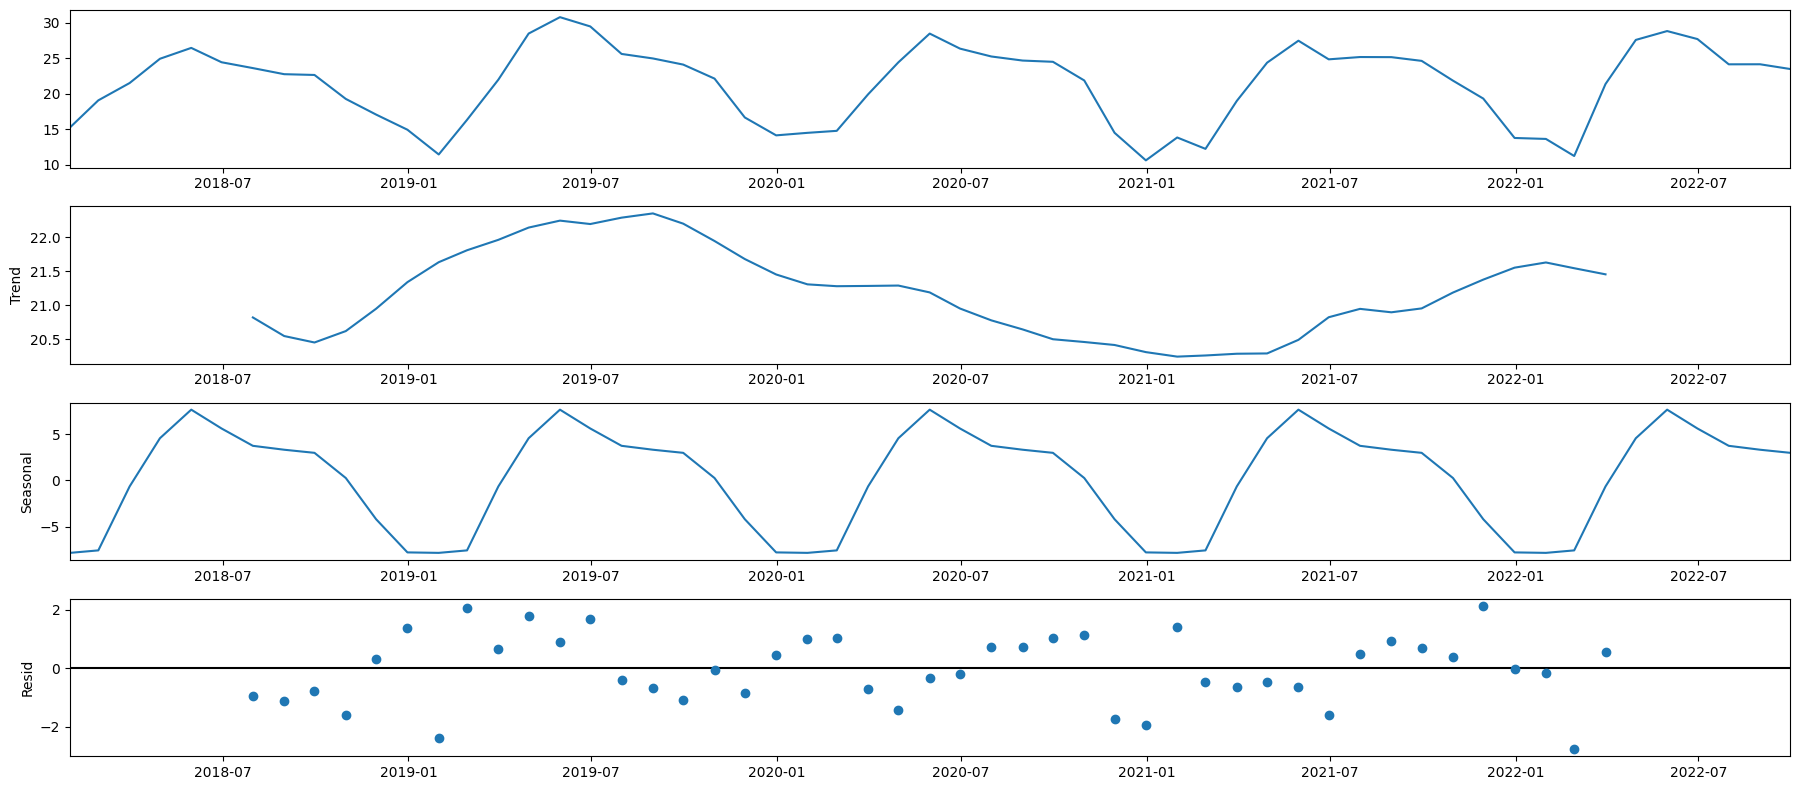

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ndf, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
adfuller(ndf)

(-1.1191749856938584,
 0.707364884274003,
 11,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 203.4460224869649)

In [12]:
ndf['shift']=ndf.shift()
ndf['shiftdiff']=ndf.temp_min-ndf['shift']
ndf.head()

,temp_min,shift,shiftdiff
date,,,
2018-01-31,15.241935,NaN,NaN
2018-02-28,19.053571,15.241935,3.811636
2018-03-31,21.493548,19.053571,2.439977
2018-04-30,24.910000,21.493548,3.416452
2018-05-31,26.441935,24.910000,1.531935


In [13]:
avg=ndf['shiftdiff'].mean()
ndf['shiftdiff'].replace(np.nan,avg,inplace=True)

In [14]:
adfuller(ndf['shiftdiff'])

(-3.202134193721715,
 0.019861475588074762,
 11,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 201.4861976869625)

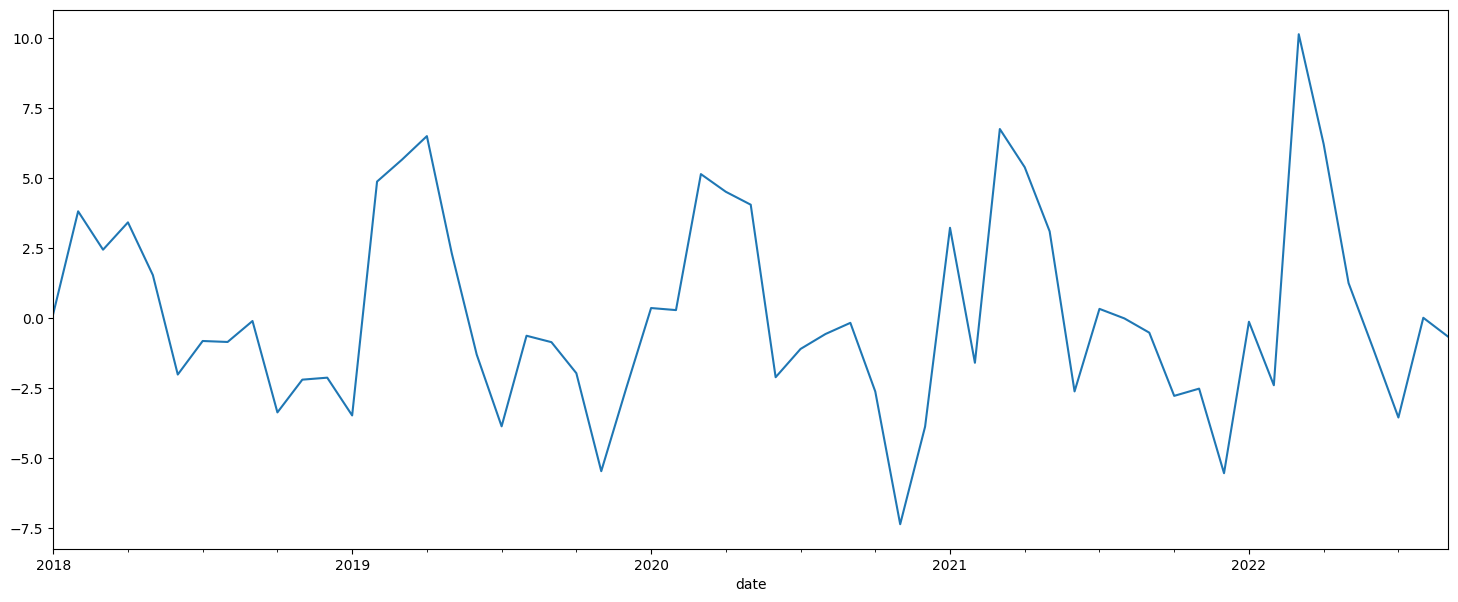

In [15]:
ndf['shiftdiff'].plot(figsize=(18,7))
plt.show()

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

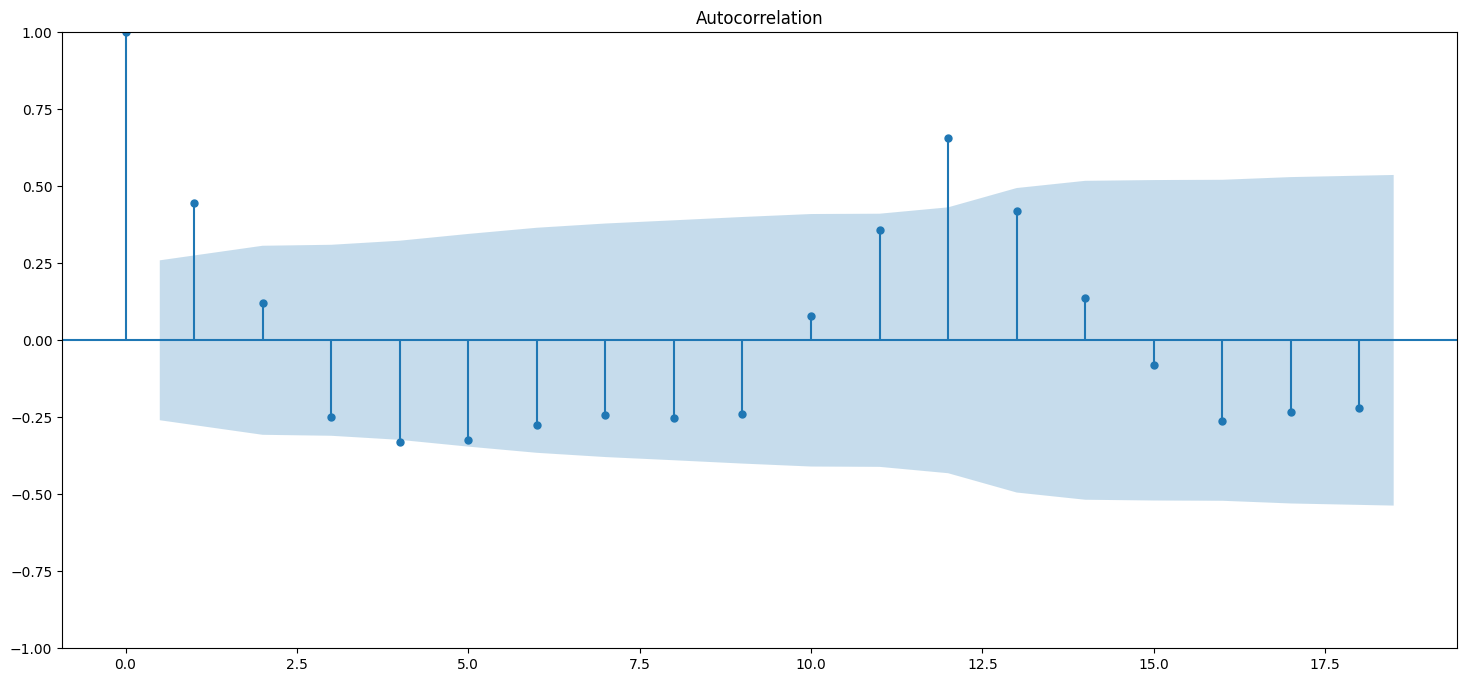

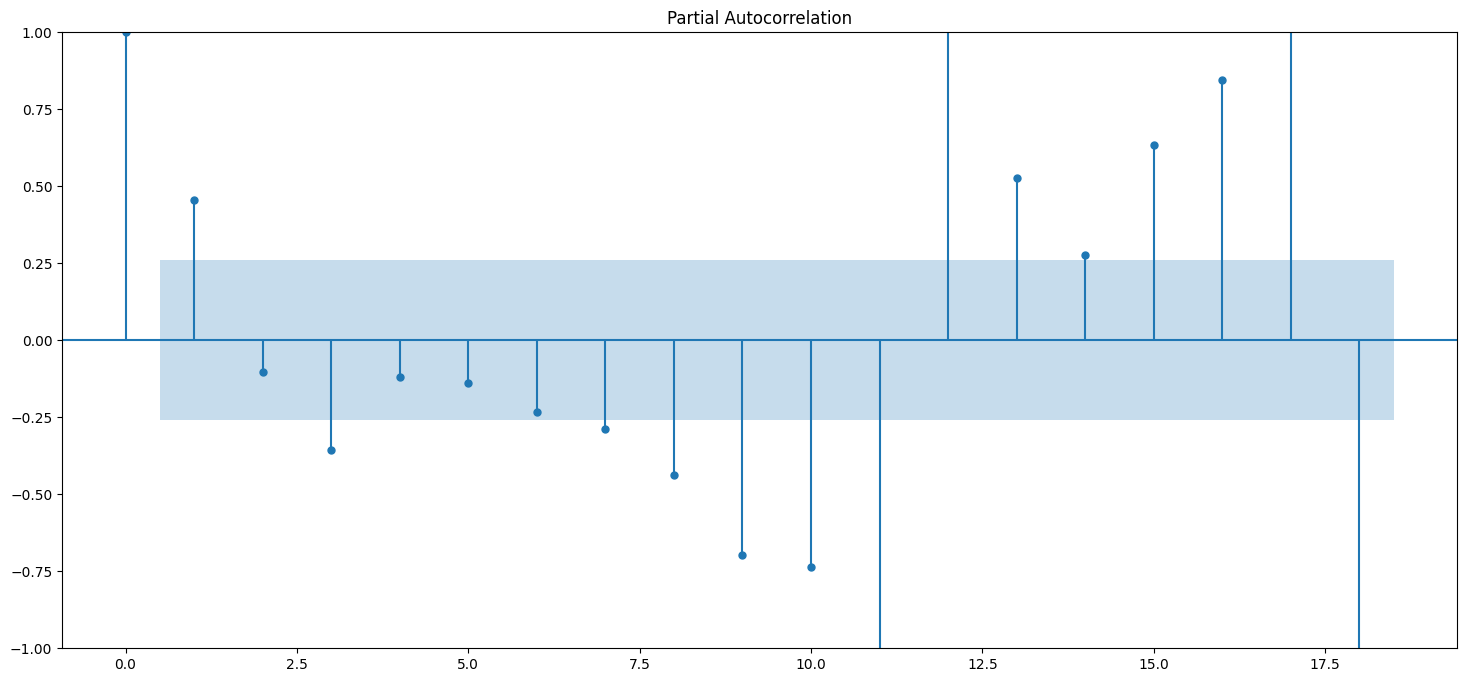

In [17]:
plot_acf(ndf['shiftdiff'])
plot_pacf(ndf['shiftdiff'])
plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
train=ndf[:len(ndf)*80//100]

In [20]:
len(train)

45

In [21]:
test=ndf[len(ndf)*80//100:]

In [22]:
len(test)

12

In [23]:
model=sm.tsa.arima.ARIMA(train['temp_min'],order=(1,1,2))

In [24]:
model_fit=model.fit()

In [25]:
prediction=model_fit.predict(start=test.index[0],end=test.index[-1])

In [26]:
prediction

2021-10-31    23.973405
2021-11-30    23.242912
2021-12-31    22.700781
2022-01-31    22.298442
2022-02-28    21.999849
2022-03-31    21.778250
2022-04-30    21.613792
2022-05-31    21.491741
2022-06-30    21.401161
2022-07-31    21.333938
2022-08-31    21.284049
2022-09-30    21.247024
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot: xlabel='date'>

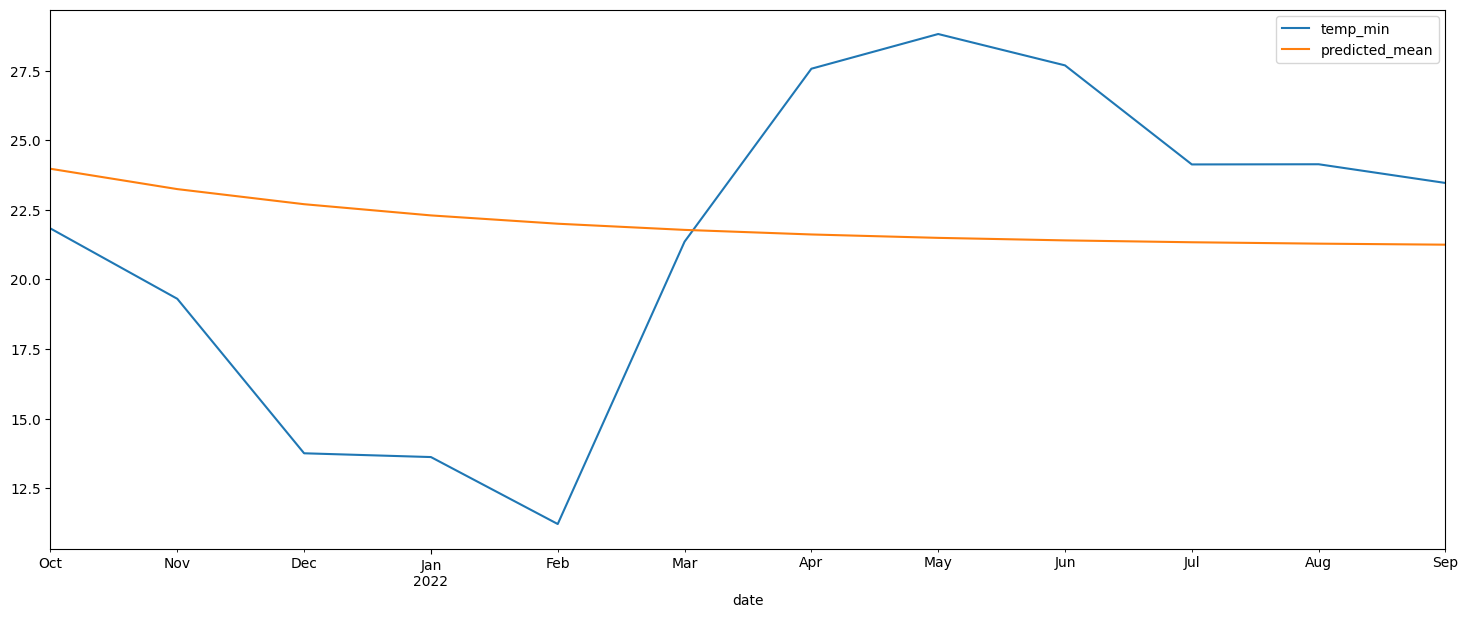

In [27]:
test['temp_min'].plot(figsize=(18,7),legend=True)
prediction.plot(legend=True)

In [28]:
ndf['arimaPred']=prediction

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
np.sqrt(mean_squared_error(test['temp_min'],prediction))

6.064800665848036

In [31]:
ndf['diff12']=ndf['temp_min'].diff(12)

In [32]:
ndf.head()

,temp_min,shift,shiftdiff,arimaPred,diff12
date,,,,,
2018-01-31,15.241935,NaN,0.146811,NaN,NaN
2018-02-28,19.053571,15.241935,3.811636,NaN,NaN
2018-03-31,21.493548,19.053571,2.439977,NaN,NaN
2018-04-30,24.910000,21.493548,3.416452,NaN,NaN
2018-05-31,26.441935,24.910000,1.531935,NaN,NaN


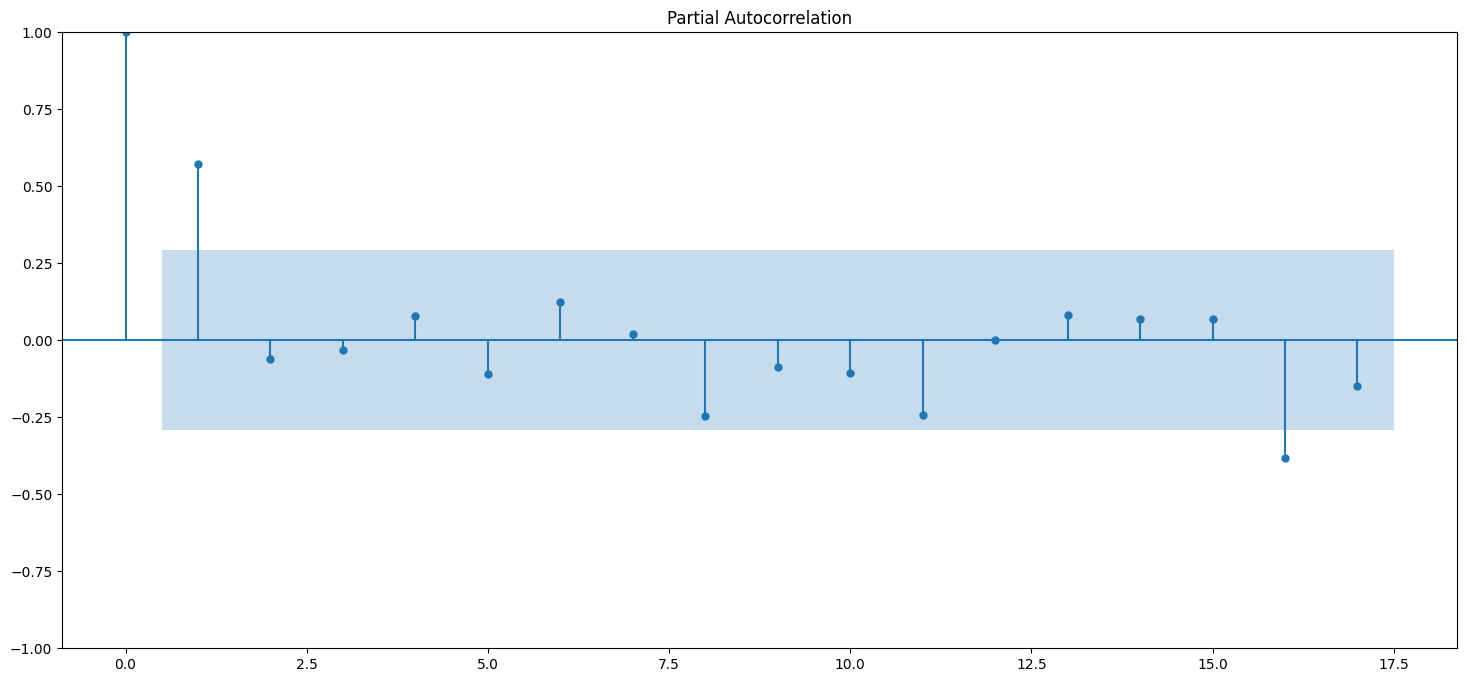

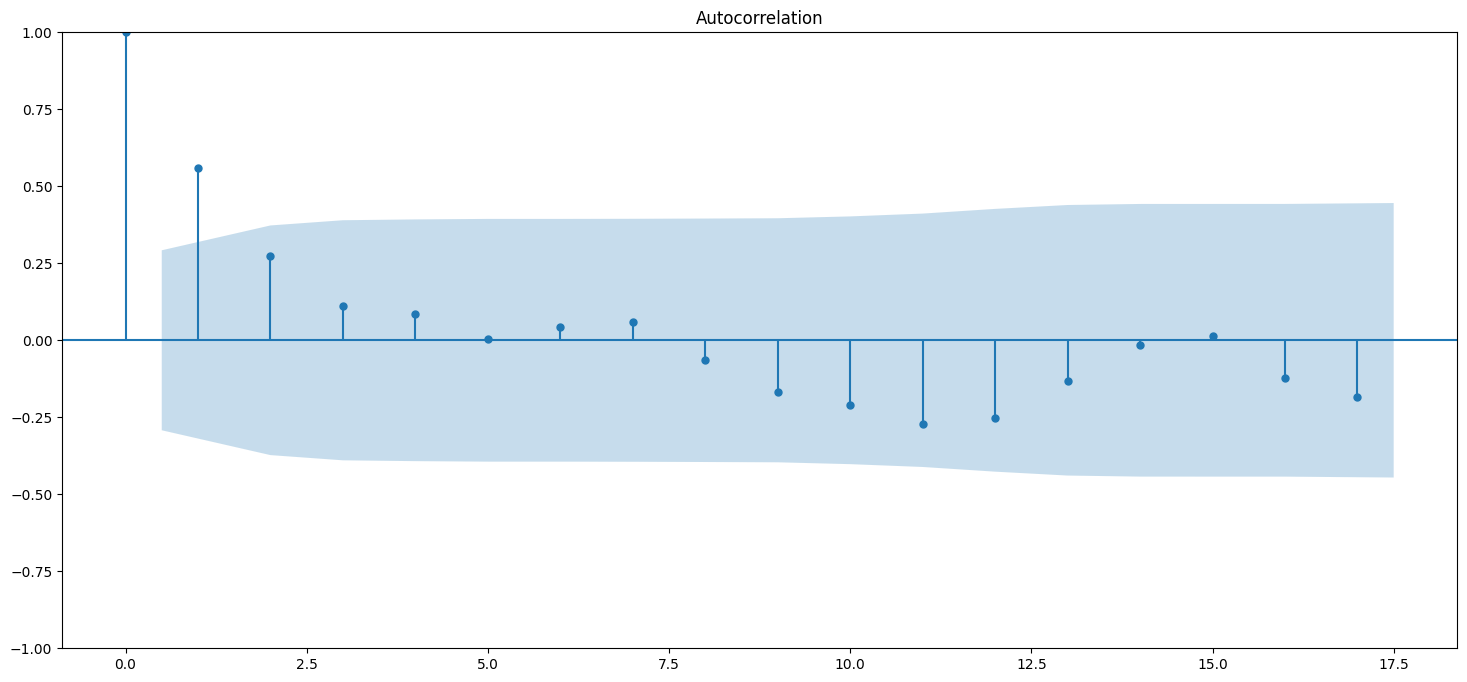

In [33]:
plot_pacf(ndf['diff12'].dropna())
plot_acf(ndf['diff12'].dropna())
plt.show()

In [34]:
model=sm.tsa.statespace.SARIMAX(train['temp_min'],order=(1,1,2),seasonal_order=(1,1,4,12))

In [35]:
model_fit=model.fit()

In [36]:
predictions=model_fit.predict(start=test.index[0],end=test.index[-1])

In [37]:
ndf['sarimaPred']=predictions

In [38]:
predictions

2021-10-31    22.104206
2021-11-30    14.335824
2021-12-31    10.351368
2022-01-31    14.092207
2022-02-28    11.819439
2022-03-31    18.306125
2022-04-30    23.244634
2022-05-31    26.411223
2022-06-30    23.611332
2022-07-31    24.571070
2022-08-31    24.565101
2022-09-30    24.167470
Freq: M, Name: predicted_mean, dtype: float64

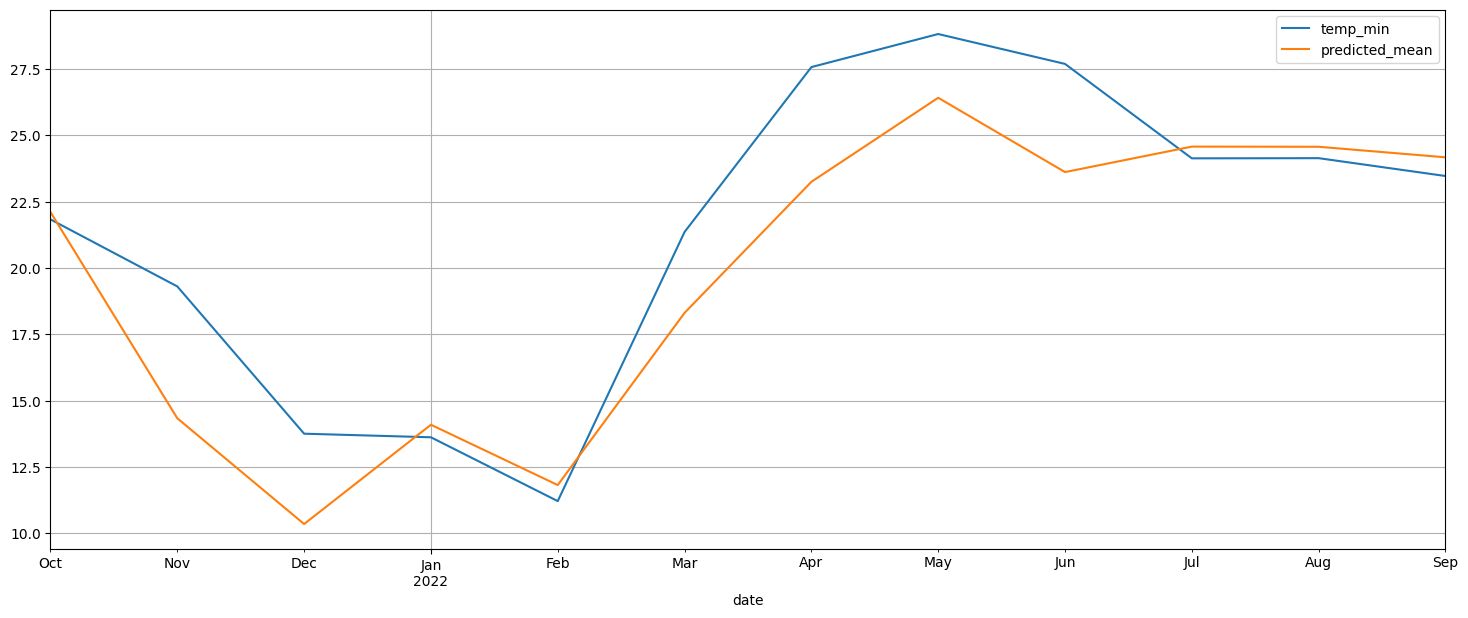

In [39]:
test['temp_min'].plot(figsize=(18,7),legend=True)
predictions.plot(legend=True)
plt.grid()

In [40]:
Mean_Squared_Error=np.sqrt(mean_squared_error(test['temp_min'],predictions))

In [41]:
Mean_Squared_Error

2.710352014596524

In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
Mean_Absolute_Error=mean_absolute_error(test['temp_min'],predictions)

In [44]:
Mean_Absolute_Error

2.0956426644966557

In [45]:
arr1=np.array(Mean_Squared_Error)
arr2=np.array(Mean_Absolute_Error)

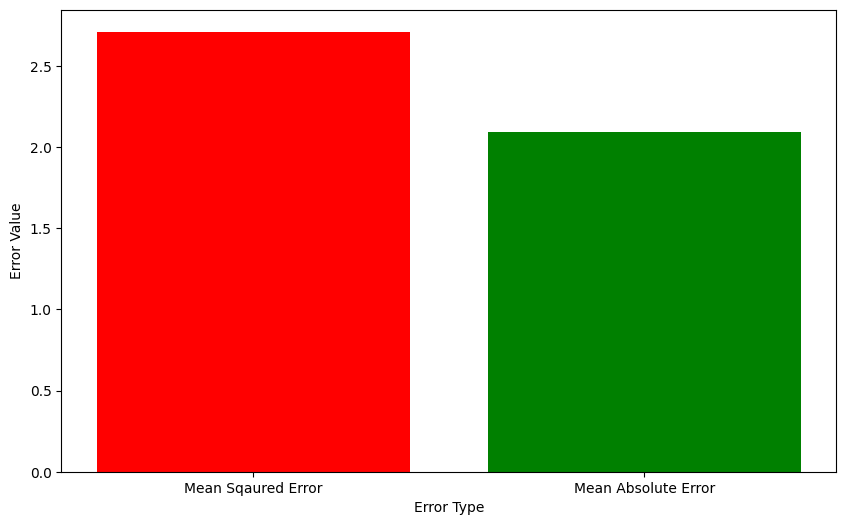

In [46]:
plt.figure(figsize=(10,6))
colors = ['r', 'g']
tick_label=['Mean Sqaured Error','Mean Absolute Error']
plt.bar(['MSE', 'MAE'], [arr1, arr2],tick_label=tick_label,color=colors)
plt.xlabel("Error Type")
plt.ylabel("Error Value")
plt.show()

In [47]:
future=pd.DataFrame(pd.date_range("2022-10-01","2023-09-30",freq='MS'),columns=['date'])

In [48]:
future

,date
0,2022-10-01
1,2022-11-01
2,2022-12-01
3,2023-01-01
4,2023-02-01
5,2023-03-01
6,2023-04-01
7,2023-05-01
8,2023-06-01
9,2023-07-01


In [49]:
future.set_index('date',inplace=True)

In [50]:
future

""
date
2022-10-01
2022-11-01
2022-12-01
2023-01-01
2023-02-01
2023-03-01
2023-04-01
2023-05-01
2023-06-01


In [57]:
len(future)

12

In [51]:
Forecast=model_fit.predict(start=future.index[0],end=future.index[-1])

In [52]:
Forecast

2022-10-31    21.464553
2022-11-30    13.776149
2022-12-31     9.668001
2023-01-31    13.410226
2023-02-28    11.165544
2023-03-31    17.528196
2023-04-30    22.388937
2023-05-31    25.215380
2023-06-30    22.341335
2023-07-31    23.587240
2023-08-31    23.618489
2023-09-30    23.206850
Freq: M, Name: predicted_mean, dtype: float64

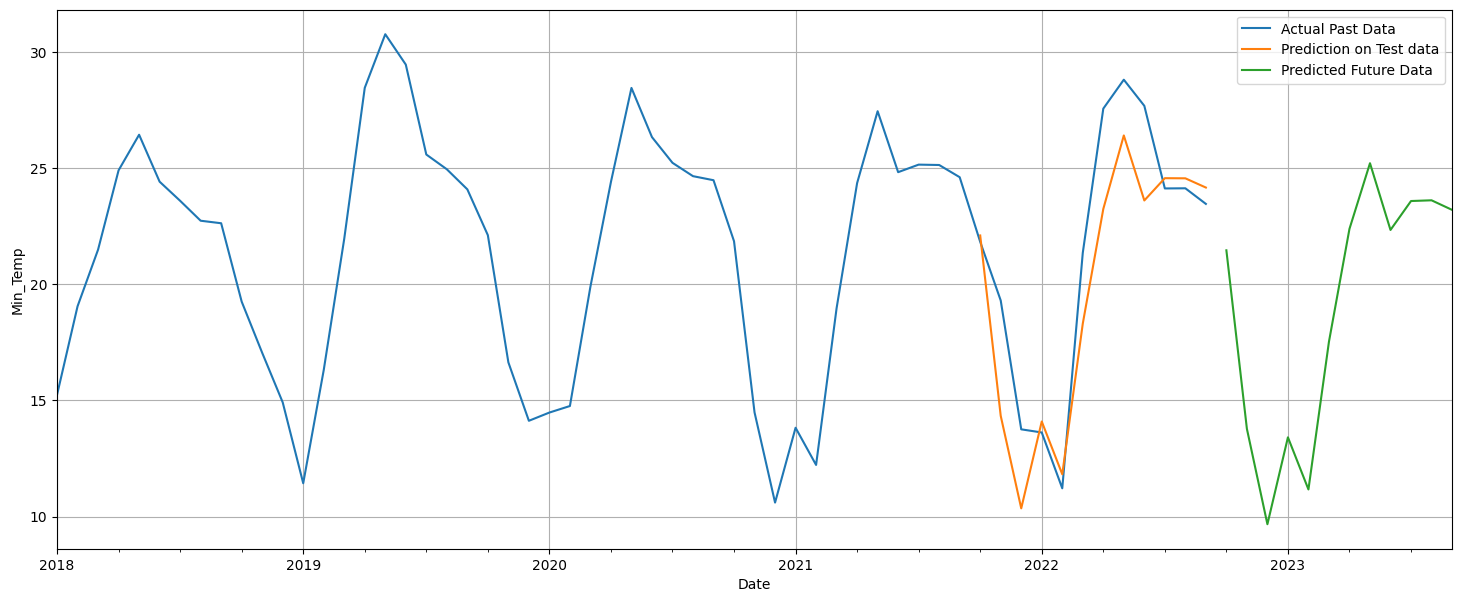

In [55]:
ax=ndf['temp_min'].plot(label="Actual Past Data")
predictions.plot(ax=ax,label="Prediction on Test data")
Forecast.plot(ax=ax,label="Predicted Future data",figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Min_Temp")
plt.legend(["Actual Past Data","Prediction on Test data","Predicted Future Data"])
plt.grid()
plt.show()